# Analyzing the Relationship between Employee Resignation and Dissatisfaction

This project aims to understand the relationship between employee resignation and dissatisfaction in order to help organizations improve their work environment, policies, and practices. By addressing these issues, organizations can create a more positive and engaging workplace, leading to increased employee satisfaction, higher retention rates, and improved overall organizational performance. The insights gained from this project will contribute to the broader knowledge on employee engagement and retention, benefiting both researchers and practitioners in the field of human resources.
<br>
The project seeks to answer two key questions:

1. Do employees with shorter tenures at the institutes tend to resign due to dissatisfaction compared to those who have been there longer?
2. Is there a correlation between dissatisfaction and resignations among younger employees, and how does this compare to older employees?

## Data
We will work with two exist surveys from employee of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The data of DETE can be found (here)[https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey], but the data fro TAFE is no longer available.
<br>
<br>
Here is a preview of the columns we will be working with from the `dete_survey.csv`:

|Column Name| Description|
| ----------| -----------|
ID| An identification number assigned to each survey participant
SeparationType| The reason for the termination of employment
Cease Date| The year or month when the person's employment ended
DETE Start Date| The year when the person started employment with DETE
</table>

And here is a preview of the columns we will be working with from the `tafe_survey.csv`:
<br>

|Column Name| Description|
| ----------| -----------|
Record ID| An identification number assigned to each survey participant
Reason for ceasing employment| The reason for the termination of employment
LengthofServiceOverall| The overall length of the person's employment at the institute, measured in years

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in and display DETE survey
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dete_survey.info())
print(dete_survey.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

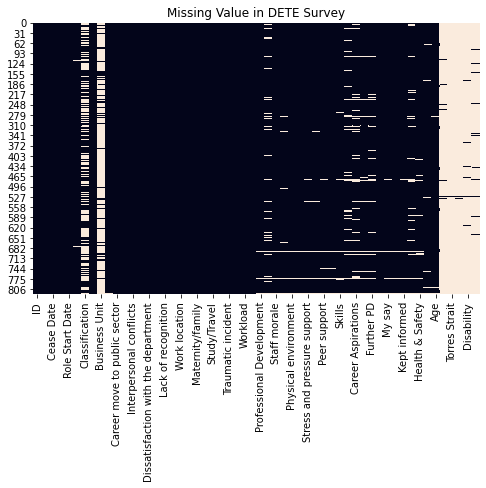

In [4]:
# Plot heatmap for missing values
plt.figure(figsize=(8,5))
plt.title('Missing Value in DETE Survey')
sns.heatmap(dete_survey.isnull(), cbar=False)
plt.show()

In the figure above, the black color represents cells with a value, while the light yellow color indicates missing values.

The DETE survey dataset consists of 56 columns and 822 rows. Some columns have missing values, particularly the "Classification," "Business Unit," "Torres Strait," and "Disability" columns, where most of the data is missing. Some missinga values are labeled as "Not Stated" instead of `NaN`.

Besides, the "Age" column is in the form of range.

In [5]:
# Read in TAFE survey
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

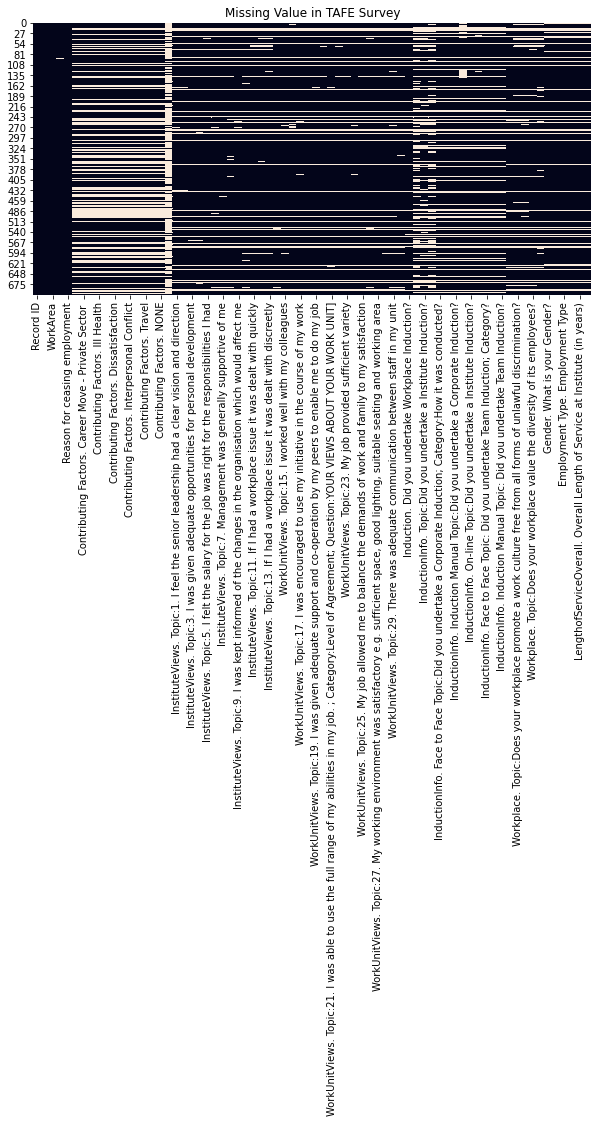

In [7]:
# Plot heatmap for missing values
plt.figure(figsize=(10,5))
plt.title('Missing Value in TAFE Survey')
sns.heatmap(tafe_survey.isnull(), cbar=False)
plt.show()

Based on the provided TAFE data, we made the following observations:

- The TAFE survey has a higher number of missing values compared to the DETE survey. The missing values are indicated by different formats, such as NaN or -.
- The "Cessation Year" column contains decimal values.
- Some column names are lengthy and include symbols like question marks, colons, and parentheses.
- The overall length of service and current age are represented as ranges.

In [8]:
print(dete_survey['SeparationType'].value_counts())
print(tafe_survey['Reason for ceasing employment'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64


## Data Celaning
### [1] Identify Missing Values & Remove Unneccessary Columns
We will first address the issue of missing values. 

In [9]:
# Define the name of the NaN while reading in data
dete_survey = pd.read_csv('dete_survey.csv',na_values="Not Stated")
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


Let's now drop some columns we won't be using to make the data frame easier to work with.

In [10]:
# Drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

The two datasets contain similar columns, although they are named differently. Here are the columns we will focus on for our analysis:


|dete_survey|tafe_survey|Definition|
|---------- | ---------- | ------------|
ID|Record ID|An id used to identify the participant of the survey
SeparationType|Reason for ceasing employment|The reason why the participant's employment ended
Cease Date|CESSATION YEAR|The year or month the participant's employment ended
DETE Start Date| |The year the participant began employment with the DETE
 |LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)
Age|CurrentAge. Current Age|The age of the participant 
Gender|Gender. What is your Gender?|The gender of the participant


### [2] Rename Columns
To analyze the two datasets collectively, we will merge them. But first, we will renmae the column names.

In [11]:
# Make all the capitalization lowercase.
# Remove any trailing whitespace from the end of the strings.
# Replace spaces with underscores ('_').

print(dete_survey_updated.columns)
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower()
                       .str.strip()
                       .str.replace(' ','_')
                      )
print(dete_survey_updated.columns)
dete_survey_updated.head(3)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'int

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
mapping = {'Record ID': 'id',
            'CESSATION YEAR': 'cease_date',
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender',
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
          }

print(tafe_survey_updated.columns)
tafe_survey_updated.rename(columns=mapping, inplace=True)
print(tafe_survey_updated.columns)
tafe_survey_updated.head(3)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


### [4] Filter the Data
To determine whether employee resignations are due to dissatisfaction, whether for employees with a short period of employment or a long period, we shifted our focus to the "separationtype" column.

In [13]:
# TAFE survey separation reasons
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
# DETE survey separation reasons
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We will have to account for the three different resignations in the DETE survey:
- Resignation-Other reasons
- Resignation-Other employer 
- Resignation-Move overseas/interstate 

In [15]:
# Single out the resignation type in the two datasets

# TAFE
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# DETE
condition1 = dete_survey_updated['separationtype'] == 'Resignation-Other reasons'
condition2 = dete_survey_updated['separationtype'] == 'Resignation-Other employer'
condition3 = dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate'
dete_resignations = dete_survey_updated[condition1 | condition2 | condition3].copy()

Now we have two datasets `dete_resignations` and `tafe_resignations` representing the rows that have resignation as separation type.

### [5] Verifying the Data

Before delving into cleaning and manipulating the data, let's first examine if there's any inconsistencies in the data. We will verifying the date columns `cease_date` (the last year of the employment) and `dete_start_date` (the first year of the employment) columns by checking:
- `cease_date` > `dete_start_date`
- `dete_start_date` > 1940 since most people in the field start working in their 20s.

We will exclude data that are excessively high or low. However, if the majority of the data does not meet the criteria, it is advisable to halt our analysis as there may be numerous errors in the dataset.

In [16]:
# Clean the cease_date column in dete_resignations
print(dete_resignations['cease_date'].value_counts())

dete_resignations['cease_date_clean'] = (dete_resignations['cease_date']
                                        .str.split('/')
                                        .str[-1]
                                        .astype(float)
                                        )
print(dete_resignations['cease_date_clean'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date_clean, dtype: int64


In [17]:
# Examine the date values
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True))
print(dete_resignations['cease_date_clean'].value_counts().sort_index(ascending=True))
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date_clean, dtype: int64
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


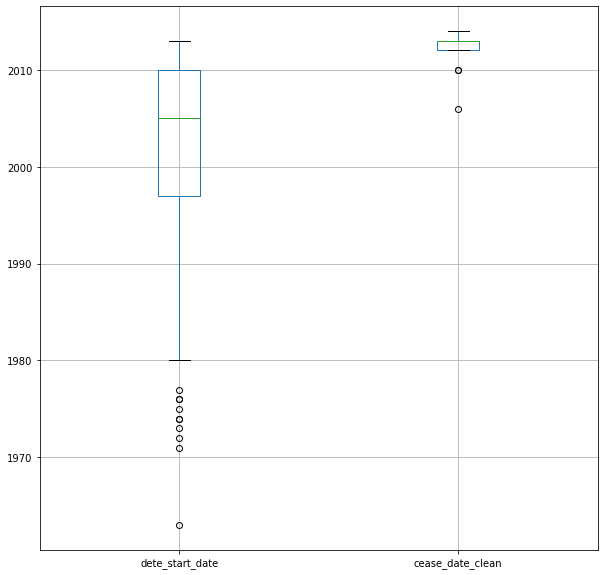

In [18]:
# Plot dete cease and start date data
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,10))
dete_resignations[['dete_start_date','cease_date_clean']].boxplot()
# plt.xticks(rotation=45)#, ha='right')
plt.show()

<AxesSubplot:>

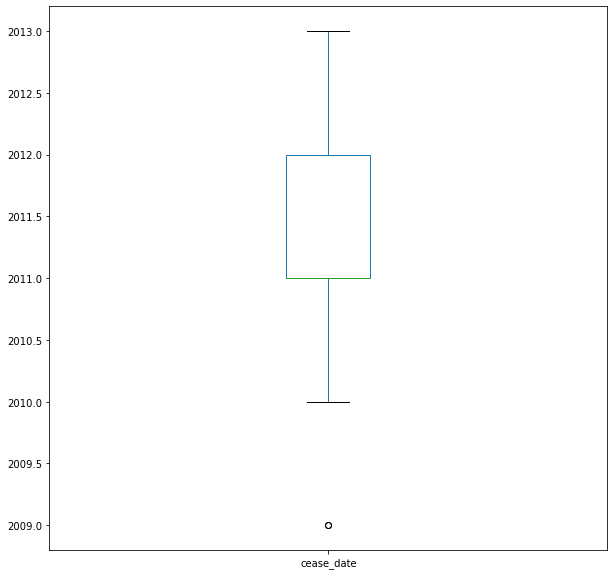

In [19]:
# Plot tafe cease date data
fig, ax = plt.subplots(figsize=(10,10))
tafe_resignations['cease_date'].plot(kind='box')

The DETE data has reasonable dates where cease dates are generally smaller than start date and start dates are all after 1940.


The `institute_service` column in TAFE survey contains the years of service. And the service time length of DETE data can be obtained by subtracting the cease year from the start year.

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date_clean'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head(5)

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Now we have the length of service for both datasets, which we can use to determine whether employees with shorter tenures at the institutes are more likely to resign due to dissatisfaction compared to those who have been there longer.
    
### [6] Identify Dissatisfied Employees
Here, we listed the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. TAFE survey:
    - 'Contributing Factors. Dissatisfaction'
    - 'Contributing Factors. Job Dissatisfaction'

2. DETE survey
    - 'job_dissatisfaction'
    - 'dissatisfaction_with_the_department'
    - 'physical_work_environment'
    - 'lack_of_recognition'
    - 'lack_of_job_security'
    - 'work_location'
    - 'employment_conditions'
    - 'work_life_balance'
    - 'workload'

If the employee indicated any of the factors mentioned above as the cause of their resignation, we will label them as "dissatisfied" in a new column.


In [21]:
# Present how the values are filled in the TAFE survey
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [22]:
# Present how the values are filled in the TAFE survey
print(dete_resignations['job_dissatisfaction'].value_counts(dropna=False))
print(dete_resignations['dissatisfaction_with_the_department'].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


Since the two datasets use different representations for dissatisfaction, we will convert the values in the TAFE data columns to `True`, `False`, or `NaN` to align them with the DETE dataset.

If any of the columns listed above contains a True value, we will add a corresponding True value to a new column called "dissatisfied". To achieve this, we will write a function that performs the following actions:

- Returns True if any element in the selected columns above is True (employee resigned due to dissatisfication)
- Returns False if none of the elements in the selected columns above is True (employee resigned due to other reasons)
- Returns NaN if the value is NaN (missing value)

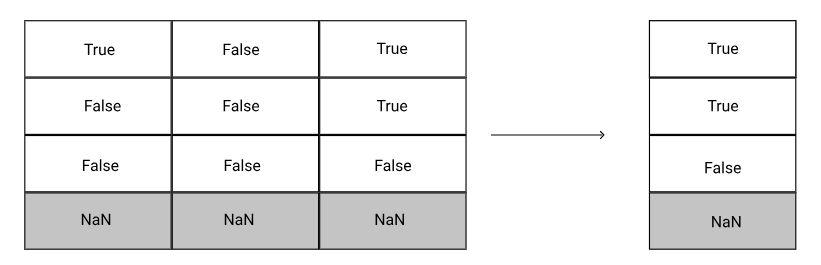
(Image Source: Dataquest)

In [23]:
# Update the values in the dataframe so that each contains only True, False, or NaN values.
def update_vals(series):
    if pd.isnull(series):
        return np.nan
    elif series == '-':
        return False
    else:
        return True

In [24]:
# Update TAFE data
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals)
                                     .any(axis=1, skipna=False)
                                    )

print(tafe_resignations['dissatisfied'].head(10))
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14     True
Name: dissatisfied, dtype: object
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [25]:
# Update DETE data
dete_resignations['dissatisfied']  = dete_resignations[['job_dissatisfaction',
                                                        'dissatisfaction_with_the_department',
                                                        'physical_work_environment',
                                                        'lack_of_recognition',
                                                        'lack_of_job_security',
                                                        'work_location',
                                                        'employment_conditions',
                                                        'work_life_balance',
                                                        'workload'
                                                      ]].any(axis=1, skipna=False)

print(dete_resignations['dissatisfied'].head(10))
print(dete_resignations['dissatisfied'].value_counts(dropna=False))


3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
Name: dissatisfied, dtype: bool
False    162
True     149
Name: dissatisfied, dtype: int64


In [26]:
# Copy the results to avoid SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

Now both datasets contain only values with True, False, and NaN.


### [7] Combine the Two Datasets & Filter Columns
So far, we've
1. Renamed our columns
2. Dropped any data not needed for our analysis
3. Verified the quality of our data
4. Created a new institute_service column
5. Cleaned the Contributing Factors columns
6. Created a new column indicating if an employee resigned because they were dissatisfied in some way

Our next step is combining the two datasets. Our end goal ist to aggregate the data according to the `institute_service` column. To help us better distinguish which dataframe the data belongs to, we will first add a column. 

In [27]:
# Add a column to better distinguish between the two datasets
dete_resignations_up.loc[:,'institute'] = 'DETE'
tafe_resignations_up.loc[:,'institute'] = 'TAFE'

In [28]:
# COmbine the two datasets
combined = pd.concat([dete_resignations_up,tafe_resignations_up],axis=0)

In [29]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
cease_date_clean                                       300
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           3

We still have columns that we are not going to use in this analysis, so we will drop columns with less than 500 non null values.

In [30]:
# Drop columns with <500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
5,6.000000e+00,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
8,9.000000e+00,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
9,1.000000e+01,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


### [8] Clean the `institute_service` Column

The column `institute_service` has different forms such as:

In [31]:
combined_updated['institute_service'].value_counts(dropna=False).sort_values(ascending=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
10.0                   6
22.0                   6
14.0                   6
12.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
26.0                   2
30.0                   2
28.0                   2
25.0                   2
36.0                   2


Based on [an article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) that argues for the effectiveness of understanding employee needs based on career stage rather than age, we will be using slightly modified definitions for each career stage:
- New: Employees with less than 3 years of experience at a company.
- Experienced: Employees with 3-6 years of experience at a company.
- Established: Employees with 7-10 years of experience at a company.
- Veteran: Employees with 11 or more years of experience at a company.

In [32]:
# Show the values in the `institute_service` column
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
14.0                   6
22.0                   6
12.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
26.0                   2
25.0                   2
28.0                   2
36.0                   2
30.0                   2
38.0                   1


In [33]:
# Extract numeric values 
combined_updated['institute_service_num'] = (combined_updated['institute_service']
                                             .astype('str')
                                             .str.extract(r'(\d+)')
                                             .astype(float)
                                                    )
combined_updated['institute_service_num'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
10.0      6
12.0      6
22.0      6
17.0      6
18.0      5
16.0      5
24.0      4
23.0      4
32.0      3
39.0      3
19.0      3
21.0      3
25.0      2
28.0      2
36.0      2
26.0      2
30.0      2
49.0      1
33.0      1
34.0      1
29.0      1
35.0      1
42.0      1
27.0      1
31.0      1
41.0      1
38.0      1
Name: institute_service_num, dtype: int64

In [34]:
# A function that map each value to one of the career stage defined above
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif (val < 3):
        return 'New (<3 yrs)'
    elif (val >= 3) and (val <= 6):
        return 'Experienced (3-6 yrs)'
    elif (val >= 7) and (val <= 10):
        return 'Established (7-10 yrs)'
    else:
        return 'Veteran (>10 yrs)'    

In [35]:
combined_updated['service_cat'] = combined_updated['institute_service_num'].apply(career_stage)
combined_updated['service_cat'].value_counts()

New (<3 yrs)              193
Experienced (3-6 yrs)     172
Veteran (>10 yrs)         136
Established (7-10 yrs)     62
Name: service_cat, dtype: int64

## Data Analysis
Our analysis will primarily focus on dissatisfaction within different groups, such as varying service lengths, job positions, and genders.

To begin, we will examine the `dissatisfied` column and assign the null values to the most frequently occurring type.

In [36]:
# Confirm the number of True, False, and NaN values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [37]:
# Assign the missing values to the most frequently occur value: False
combined_updated['dissatisfied'].fillna(value=False,inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

### Dissatisfication vs. Career Stage

                        dissatisfied
service_cat                         
Established (7-10 yrs)      0.516129
Experienced (3-6 yrs)       0.343023
New (<3 yrs)                0.295337
Veteran (>10 yrs)           0.485294


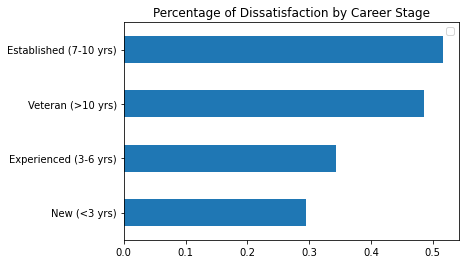

In [38]:
# Calculate the percentage of dissatisfied employees in each `service_cat` group
dis_combined = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
print(dis_combined)
dis_combined.sort_values('dissatisfied').plot(kind='barh')
plt.title('Percentage of Dissatisfaction by Career Stage')
plt.ylabel('')
plt.legend('')
plt.show()

Based on the bar plot, employees with longer tenure are more likely to resign due to dissatisfaction, while newer employees (with less than 3 years of service) show lower rates of resignation due to dissatisfaction.

### Dissatisfication vs. Job Position

                                                    dissatisfied
position                                                        
Administration (AO)                                     0.216216
Business Service Manager                                0.000000
Cleaner                                                 0.487179
Executive (SES/SO)                                      0.500000
Guidance Officer                                        1.000000
Head of Curriculum/Head of Special Education            0.500000
Operational (OO)                                        0.230769
Other                                                   0.666667
Professional Officer                                    0.000000
Professional Officer (PO)                               0.125000
Public Servant                                          0.600000
School Administrative Staff                             0.375000
School Based Professional Staff (Therapist, nur...      0.200000
Schools Officer          

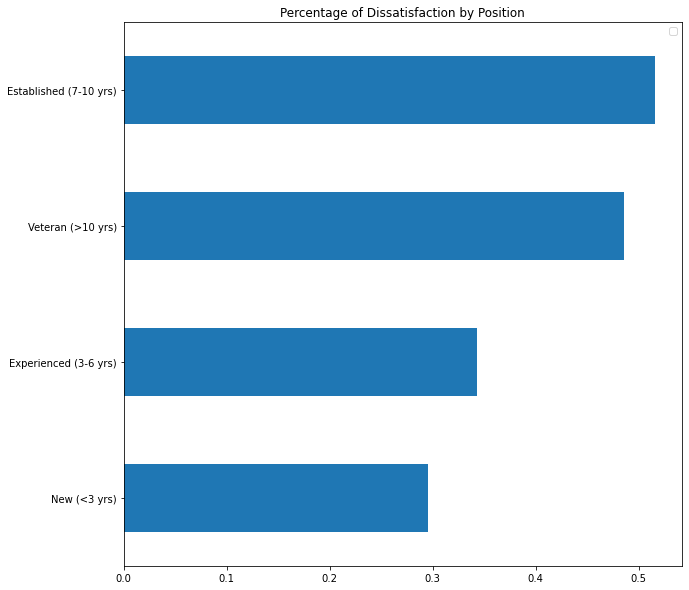

In [39]:
# Calculate the percentage of dissatisfied employees in each `position` group
pos_combined = combined_updated.pivot_table(values='dissatisfied', index='position')
print(pos_combined)
dis_combined.sort_values('dissatisfied').plot(kind='barh', figsize=(10,10))
plt.title('Percentage of Dissatisfaction by Position')
plt.ylabel('')
plt.legend('')
plt.show()

The position of Guidance Officer exhibits the highest dissatisfaction rate compared to other positions. According to the data, all of the Guidance Officer resigned due to job dissatisfaction.

### Dissatisfication vs. Job Position

        dissatisfied
gender              
Female      0.370283
Male        0.398810


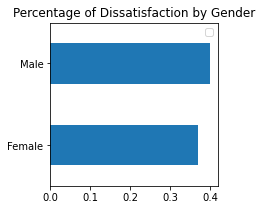

In [40]:
# Calculate the percentage of dissatisfied employees in each `position` group
gen_combined = combined_updated.pivot_table(values='dissatisfied', index='gender')
print(gen_combined)
gen_combined.sort_values('dissatisfied').plot(kind='barh', figsize=(3,3))
plt.title('Percentage of Dissatisfaction by Gender')
plt.ylabel('')
plt.legend('')
plt.show()

Although male employees have slightly higher percentage of dissatisfaction, they are generally similar for both female and male.

### Dissatisfication vs. Age
Since the age ranges are written differently in the two datasets, our first step will be to align the two different formats.

In [41]:
# Align the two formats of `age` column
combined_updated['age_updated'] = combined_updated['age'].str.replace('  ','-')
combined_updated.loc[combined_updated['age_updated'] == '56-60','age_updated'] = '56 or older'
combined_updated.loc[combined_updated['age_updated'] == '61 or older','age_updated'] = '56 or older'
combined_updated['age_updated'].value_counts()

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
20 or younger    10
Name: age_updated, dtype: int64

               dissatisfied
age_updated                
20 or younger      0.200000
21-25              0.306452
26-30              0.417910
31-35              0.377049
36-40              0.342466
41-45              0.376344
46-50              0.382716
51-55              0.422535
56 or older        0.423077


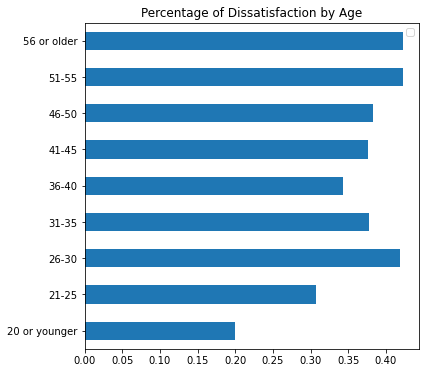

In [42]:
# Calculate the percentage of dissatisfied employees in each `position` group
age_combined = combined_updated.pivot_table(values='dissatisfied', index='age_updated')
print(age_combined)
age_combined.plot(kind='barh', figsize=(6,6))
plt.title('Percentage of Dissatisfaction by Age')
plt.ylabel('')
plt.legend('')
plt.show()


The dissatisfaction percentage is similar across different age groups, but employees younger than 20 are less likely to resign due to dissatisfaction.

## Conclusions
In conclusion, this project involved cleaning and analyzing data from two separate dataframes to examine the dissatisfaction percentage among employees with different service lengths. The findings revealed several key insights:

- Employees with longer tenures were found to have a higher likelihood of resigning due to dissatisfaction.
- The position of Guidance Officer exhibited the highest percentage of dissatisfaction among all job roles.
- The dissatisfaction percentages were found to be similar between male and female employees.
- Younger employees, specifically those below 20 years of age, displayed a lower tendency to resign due to dissatisfaction.

These results highlight the importance of considering factors such as tenure, job role, and age when evaluating employee dissatisfaction. By understanding these patterns, organizations can better identify and address areas of concern, potentially improving overall employee satisfaction and retention.
